Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Loading the dataset

In [3]:
churn_master_data = pd.read_csv('../dataset/wls_churn_master_target_t1.csv')
customer_demographic_data = pd.read_csv('../dataset/wls_customer_demographics_t1.csv')
billing_data = pd.read_csv('../dataset/wls_billing.csv')

### Data Exploration

churn_master_data

In [4]:
churn_master_data.head()

,Customer_ID,mrc_current_month,mvsf_br_amt_current_month,mvsf_mrc_current_month,num_subs_current_month,num_voice_subs_current_month,num_nonvoice_subs_current_month,rev_current_month,churn
0,0,161.66,131.66,130.00,2,2,0,131.66,0.0
1,1,46.92,45.00,35.00,1,0,1,46.92,0.0
2,2,229.15,229.15,155.00,2,2,0,229.15,0.0
3,3,101.53,91.53,75.00,1,1,0,91.53,0.0
4,4,559.90,460.39,330.97,6,4,2,475.55,1.0


In [5]:
churn_master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer_ID                      9590 non-null   int64  
 1   mrc_current_month                9590 non-null   float64
 2   mvsf_br_amt_current_month        9581 non-null   float64
 3   mvsf_mrc_current_month           9590 non-null   float64
 4   num_subs_current_month           9590 non-null   int64  
 5   num_voice_subs_current_month     9590 non-null   int64  
 6   num_nonvoice_subs_current_month  9590 non-null   int64  
 7   rev_current_month                9590 non-null   float64
 8   churn                            9590 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 674.4 KB


In [6]:
churn_master_data.columns

Index(['Customer_ID', 'mrc_current_month', 'mvsf_br_amt_current_month',
       'mvsf_mrc_current_month', 'num_subs_current_month',
       'num_voice_subs_current_month', 'num_nonvoice_subs_current_month',
       'rev_current_month', 'churn'],
      dtype='object')

In [7]:
churn_master_data.shape

(9590, 9)

customer_demographic_data

In [8]:
customer_demographic_data.head()

,Customer_ID,n_distinct_srvc_prov_state_cd_current_month,n_distinct_sls_indust_typ_txt_current_month,n_distinct_clli_exch_cd_current_month,n_distinct_billg_prov_state_cd_current_month,n_distinct_pymt_mthd_cd_current_month,n_distinct_rgnl_cust_prov_state_cd_current_month,n_distinct_cbu_cust_prov_state_cd_current_month,srvc_prov_state_cd_ab_ind_current_month,srvc_prov_state_cd_bc_ind_current_month,...,pymt_mthd_cd_tbsqbsb_ind_current_month,pymt_mthd_cd_tbsqbsh_ind_current_month,pymt_mthd_cd_tcso_ind_current_month,pymt_mthd_cd_tcsobpr_ind_current_month,pymt_mthd_cd_tcsoothr_ind_current_month,pymt_mthd_cd_tcsqothr_ind_current_month,pymt_mthd_cd_teso_ind_current_month,pymt_mthd_cd_tesobsb_ind_current_month,pymt_mthd_cd_tesoothr_ind_current_month,pymt_mthd_cd_tpsoothr_ind_current_month
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
customer_demographic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 93 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Customer_ID                                       9590 non-null   int64
 1   n_distinct_srvc_prov_state_cd_current_month       9590 non-null   int64
 2   n_distinct_sls_indust_typ_txt_current_month       9590 non-null   int64
 3   n_distinct_clli_exch_cd_current_month             9590 non-null   int64
 4   n_distinct_billg_prov_state_cd_current_month      9590 non-null   int64
 5   n_distinct_pymt_mthd_cd_current_month             9590 non-null   int64
 6   n_distinct_rgnl_cust_prov_state_cd_current_month  9590 non-null   int64
 7   n_distinct_cbu_cust_prov_state_cd_current_month   9590 non-null   int64
 8   srvc_prov_state_cd_ab_ind_current_month           9590 non-null   int64
 9   srvc_prov_state_cd_bc_ind_current_month  

In [10]:
customer_demographic_data.columns

Index(['Customer_ID', 'n_distinct_srvc_prov_state_cd_current_month',
       'n_distinct_sls_indust_typ_txt_current_month',
       'n_distinct_clli_exch_cd_current_month',
       'n_distinct_billg_prov_state_cd_current_month',
       'n_distinct_pymt_mthd_cd_current_month',
       'n_distinct_rgnl_cust_prov_state_cd_current_month',
       'n_distinct_cbu_cust_prov_state_cd_current_month',
       'srvc_prov_state_cd_ab_ind_current_month',
       'srvc_prov_state_cd_bc_ind_current_month',
       'srvc_prov_state_cd_mb_ind_current_month',
       'srvc_prov_state_cd_nb_ind_current_month',
       'srvc_prov_state_cd_nl_ind_current_month',
       'srvc_prov_state_cd_ns_ind_current_month',
       'srvc_prov_state_cd_nt_ind_current_month',
       'srvc_prov_state_cd_nu_ind_current_month',
       'srvc_prov_state_cd_on_ind_current_month',
       'srvc_prov_state_cd_pe_ind_current_month',
       'srvc_prov_state_cd_qc_ind_current_month',
       'srvc_prov_state_cd_sk_ind_current_month',
       's

In [11]:
customer_demographic_data.shape

(9590, 93)

billing_data

In [12]:
billing_data.head()

,Customer_ID,write_off_ind_n_ind_current_month,write_off_ind_y_ind_current_month,payment_method_cd_c_ind_current_month,payment_method_cd_ca_ind_current_month,payment_method_cd_cc_ind_current_month,payment_method_cd_d_ind_current_month,payment_method_cd_dd_ind_current_month,payment_method_cd_r_ind_current_month,kb_payment_method_cd_c_ind_current_month,kb_payment_method_cd_d_ind_current_month,kb_payment_method_cd_r_ind_current_month,auto_payment_method_cd_ca_ind_current_month,auto_payment_method_cd_cc_ind_current_month,auto_payment_method_cd_dd_ind_current_month,kb_auto_payment_method_cd_c_ind_current_month,kb_auto_payment_method_cd_d_ind_current_month,kb_auto_payment_method_cd_r_ind_current_month
0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,3,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [13]:
billing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9590 entries, 0 to 9589
Data columns (total 18 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Customer_ID                                    9590 non-null   int64
 1   write_off_ind_n_ind_current_month              9590 non-null   int64
 2   write_off_ind_y_ind_current_month              9590 non-null   int64
 3   payment_method_cd_c_ind_current_month          9590 non-null   int64
 4   payment_method_cd_ca_ind_current_month         9590 non-null   int64
 5   payment_method_cd_cc_ind_current_month         9590 non-null   int64
 6   payment_method_cd_d_ind_current_month          9590 non-null   int64
 7   payment_method_cd_dd_ind_current_month         9590 non-null   int64
 8   payment_method_cd_r_ind_current_month          9590 non-null   int64
 9   kb_payment_method_cd_c_ind_current_month       9590 non-null   int64
 10  

In [14]:
billing_data.columns

Index(['Customer_ID', 'write_off_ind_n_ind_current_month',
       'write_off_ind_y_ind_current_month',
       'payment_method_cd_c_ind_current_month',
       'payment_method_cd_ca_ind_current_month',
       'payment_method_cd_cc_ind_current_month',
       'payment_method_cd_d_ind_current_month',
       'payment_method_cd_dd_ind_current_month',
       'payment_method_cd_r_ind_current_month',
       'kb_payment_method_cd_c_ind_current_month',
       'kb_payment_method_cd_d_ind_current_month',
       'kb_payment_method_cd_r_ind_current_month',
       'auto_payment_method_cd_ca_ind_current_month',
       'auto_payment_method_cd_cc_ind_current_month',
       'auto_payment_method_cd_dd_ind_current_month',
       'kb_auto_payment_method_cd_c_ind_current_month',
       'kb_auto_payment_method_cd_d_ind_current_month',
       'kb_auto_payment_method_cd_r_ind_current_month'],
      dtype='object')

In [15]:
billing_data.shape

(9590, 18)

### Merge Data Frames

In [16]:
churn_master_data = churn_master_data.merge(customer_demographic_data, on=['Customer_ID'], how='outer')

churn_master_data = churn_master_data.merge(billing_data, on=['Customer_ID'], how='outer')

In [17]:
churn_master_data.shape

(9590, 118)

In [18]:
churn_master_data.info

<bound method DataFrame.info of       Customer_ID  mrc_current_month  mvsf_br_amt_current_month  \
0               0             161.66                     131.66   
1               1              46.92                      45.00   
2               2             229.15                     229.15   
3               3             101.53                      91.53   
4               4             559.90                     460.39   
...           ...                ...                        ...   
9585         9585              85.00                      85.00   
9586         9586             563.31                     358.31   
9587         9587             134.42                     134.42   
9588         9588             890.01                     750.01   
9589         9589              35.00                       0.00   

      mvsf_mrc_current_month  num_subs_current_month  \
0                     130.00                       2   
1                      35.00                       

## Data Analysis

Null Value

In [19]:
null_columns = churn_master_data.columns[churn_master_data.isnull().any()]
churn_master_data[null_columns].isnull().sum()

mvsf_br_amt_current_month    9
dtype: int64

Handling Null Values with "Most Frequent Value"

In [24]:
churn_master_data['mvsf_br_amt_current_month'] = churn_master_data['mvsf_br_amt_current_month'].fillna(churn_master_data['mvsf_br_amt_current_month'].mode().iloc[0])

In [25]:
null_columns = churn_master_data.columns[churn_master_data.isnull().any()]
churn_master_data[null_columns].isnull().sum()

Series([], dtype: float64)

How Target Value Unbalanced?

C:\Users\Farid\AppData\Local\Temp\ipykernel_7856\151419662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="churn", data=churn_master_data, palette="Set1")


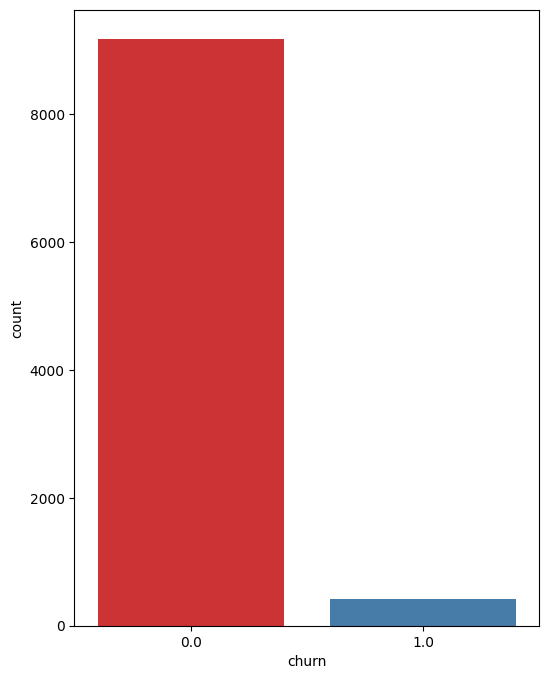

In [26]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="churn", data=churn_master_data, palette="Set1")
plt.show()

## Preprocessing Data

Drop Unneccesery column

In [27]:
churn_master_data = churn_master_data.drop(columns=['Customer_ID'])

In [28]:
ind_col = [col for col in churn_master_data.columns if col != 'churn']
dep_col = 'churn'

X = churn_master_data[ind_col]
y = churn_master_data[dep_col]

Splitting dataset into train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7672, 116), (7672,), (1918, 116), (1918,))

## Address Unbalanced Issue

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 30, k_neighbors = 4)
X_os, y_os = sm.fit_resample(X_train, y_train)

X_os.shape

In [ ]:
dataset_Oversampling = pd.concat([X_os, y_os], axis=1)

Ckecking Class Distributions

In [ ]:
f, ax = plt.subplots(figsize=(4, 6))
ax = sns.countplot(x="Class", data=dataset_Oversampling, palette="Set1")
plt.title('Class Distributions (Oversampling) \n 0: No Frauds \n 1: Frauds', fontsize=14)
plt.show()

# Models

## XGBoost

In [37]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
train_score = cross_val_score(xgb_clf, X_train, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.95333670249587
Accuracy: 0.9588112617309698


In [39]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.0
Recall Score: 0.00
Precision Score: 0.00


Confusion Matrix

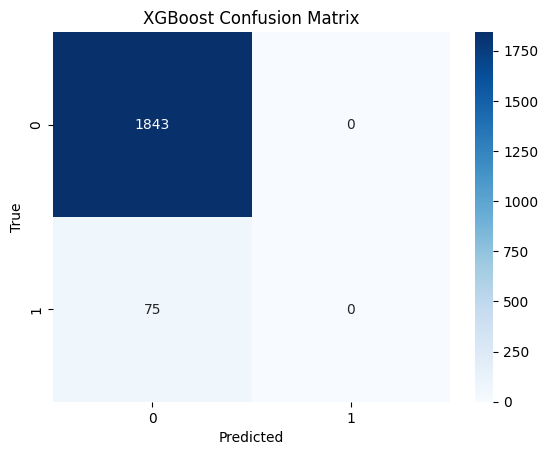

In [33]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

### Features Driving from XGBoost

In [40]:
importance_scores_xgb = xgb_clf.feature_importances_
important_features_xgb = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance Score": importance_scores_xgb
})

important_features_xgb = important_features_xgb.sort_values(by="Importance Score", ascending=False)\

important_features_xgb.head(5)

,Feature Name,Importance Score
107,kb_payment_method_cd_c_ind_current_month,0.066092
28,billg_prov_state_cd_bc_ind_current_month,0.046664
40,rgnl_cust_prov_state_cd_ab_ind_current_month,0.045952
13,n_distinct_cbu_cust_prov_state_cd_current_month,0.041865
29,billg_prov_state_cd_mb_ind_current_month,0.041806


In [41]:
zero_importance_features_xgb = important_features_xgb[important_features_xgb["Importance Score"] == 0]["Feature Name"].tolist()
print(zero_importance_features_xgb)
print(len(zero_importance_features_xgb))

['pymt_mthd_cd_tbsobsh_ind_current_month', 'pymt_mthd_cd_tbsqbem_ind_current_month', 'pymt_mthd_cd_tbsoothr_ind_current_month', 'pymt_mthd_cd_phb_ind_current_month', 'pymt_mthd_cd_tbsobme_ind_current_month', 'pymt_mthd_cd_tbsobma_ind_current_month', 'pymt_mthd_cd_pre_ind_current_month', 'pymt_mthd_cd_tbsbbpr_ind_current_month', 'pymt_mthd_cd_tbsqbpr_ind_current_month', 'pymt_mthd_cd_tbsbbem_ind_current_month', 'pymt_mthd_cd_tbsabpr_ind_current_month', 'pymt_mthd_cd_tbsabem_ind_current_month', 'pymt_mthd_cd_othr_ind_current_month', 'pymt_mthd_cd_sub_ind_current_month', 'pymt_mthd_cd_tbsqbma_ind_current_month', 'pymt_mthd_cd_teso_ind_current_month', 'pymt_mthd_cd_tbsqbsb_ind_current_month', 'pymt_mthd_cd_tbsqbsh_ind_current_month', 'kb_auto_payment_method_cd_d_ind_current_month', 'kb_auto_payment_method_cd_c_ind_current_month', 'auto_payment_method_cd_dd_ind_current_month', 'auto_payment_method_cd_cc_ind_current_month', 'auto_payment_method_cd_ca_ind_current_month', 'kb_payment_method_cd

#### Drop columns with zero importance

In [42]:
X_train_xgb_zero_importance = X_train.drop(columns=zero_importance_features_xgb)
X_test_xgb_zero_importance = X_test.drop(columns=zero_importance_features_xgb)

X_train_xgb_zero_importance.shape

(7672, 31)

### Re-Train XGBoost Model

In [43]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train_xgb_zero_importance,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
train_score = cross_val_score(xgb_clf, X_train_xgb_zero_importance, y_train, cv=5)
print(f'Training Score: {train_score.mean()}')

y_pred = xgb_clf.predict(X_test_xgb_zero_importance)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Training Score: 0.95333670249587
Accuracy: 0.9588112617309698


In [45]:
from sklearn.metrics import f1_score, precision_score
f1_score = f1_score(y_test, y_pred)
print(f'F1 Score: {f1_score}')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))

F1 Score: 0.0
Recall Score: 0.00
Precision Score: 0.00


Confusion Matrix

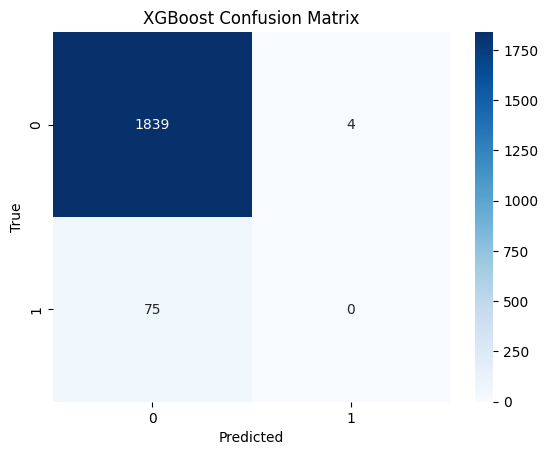

In [46]:
cnf_matrix = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("XGBoost Confusion Matrix")
plt.show()

Keep Just 5 top feature

In [ ]:
top_xgb_features = ['payment_method_cd_r_ind_current_month', 'mrc_current_month', 'mvsf_mrc_current_month', 'mvsf_br_amt_current_month']
X_train_filtered = X_train[top_xgb_features]
X_test_filtered = X_test[top_xgb_features]

## Random Forest